In [140]:
import pandas as pd #tablas https://pandas.pydata.org/docs/user_guide/pyarrow.html
import numpy as np #estadistica https://numpy.org/doc/1.25/user/index.html#user
import matplotlib.pyplot as plt #gráficos https://matplotlib.org/stable/plot_types/index.html
import seaborn as sns #gráficos https://seaborn.pydata.org/tutorial/regression.html
from sklearn import linear_model #modelo de regresion https://scikit-learn.org/stable/
from sklearn.preprocessing import MinMaxScaler # do not use the function Normalise() - it does something entirely different
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import datetime #https://docs.python.org/3/library/datetime.html
from datetime import timedelta #this is a good time to learn about dates and timestamps. You can find some info here:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import ttest_1samp
import scipy.stats as st
from sklearn.neighbors import KNeighborsClassifier
from mlxtend.plotting import plot_decision_regions
import pymysql                        # for getting data from a SQL database
from sqlalchemy import create_engine  # for establishing the connection and authentication
from getpass import getpass  # To get the password without showing the input



Importar datos

In [141]:
df = pd.read_csv("DB/zara.csv")

Análisis preliminar de los datos

In [142]:
df.isna().sum()

Product ID          0
Product Position    0
Promotion           0
Product Category    0
Seasonal            0
Sales Volume        0
brand               0
url                 0
sku                 0
name                1
description         2
price               0
currency            0
scraped_at          0
terms               0
section             0
dtype: int64

In [143]:
df.dropna(inplace=True)

In [144]:
df.describe(include= "object")

,Product Position,Promotion,Product Category,Seasonal,brand,url,sku,name,description,currency,scraped_at,terms,section
count,250,250,250,250,250,250,250,250,250,250,250,250,250
unique,3,2,1,2,1,226,226,193,221,1,227,5,2
top,Aisle,No,Clothing,Yes,Zara,https://www.zara.com/us/en/oversized-knit-swea...,316727555-700-2,PLAID OVERSHIRT,Varsity jacket with elastic collar and long sl...,USD,2024-02-19T09:10:39.911179,jackets,MAN
freq,97,132,250,127,250,2,2,6,4,250,2,138,216


In [145]:
#Eliminamos Product Category (solo hay una), brand (solo hay una), url (no contiene información relevante), analizamos si hay repetidos mediante el sku y después eliminamos el sku, scraped_at (información no relevante), section hay que analizar cuales son las que no son MAN

In [146]:
df.describe()

,Product ID,Sales Volume,price
count,250.000000,250.000000,250.000000
mean,153295.464000,1822.224000,85.230560
std,26233.797778,700.136055,50.440938
min,110075.000000,529.000000,7.990000
25%,130565.250000,1239.000000,49.900000
50%,151417.000000,1836.500000,74.945000
75%,175841.250000,2402.250000,109.000000
max,199631.000000,2989.000000,439.000000


In [147]:
#Eliminamos Product ID (no nos interesa)

Aplicamos la primera limpieza

In [148]:
columnas_drop = ["Product ID", "Product Category", "brand", "url", "scraped_at", "currency"]

In [149]:
df = df.drop(columns=columnas_drop, axis=1)


In [150]:
#analizamos el sku

df_filtered = df[df['sku'].isin(df['sku'].value_counts()[df['sku'].value_counts() > 1].index)]

In [151]:
df_filtered

#observamos que aunque el sku esté duplicado son productos que difieren en si son seasonal o no, por lo cual procedemos a no quitar los duplicados ya que nos va a traer información relevante

,Product Position,Promotion,Seasonal,Sales Volume,sku,name,description,price,terms,section
109,End-cap,Yes,No,2133,322612356-505-2,PLAID OVERSHIRT,Relaxed fit overshirt made with cotton fabric....,69.90,jackets,MAN
110,Aisle,No,No,1778,311282631-712-2,POCKET OVERSHIRT,Relaxed fit overshirt. Lapel collar and long s...,89.90,jackets,MAN
111,End-cap,Yes,No,2474,329282612-401-2,100% LINEN OVERSHIRT,Relaxed fit overshirt made of linen fabric. La...,89.90,jackets,MAN
112,Aisle,No,Yes,2032,320026789-714-2,PLAID OVERSHIRT,Relaxed fit overshirt made of viscose blend fa...,59.90,jackets,MAN
113,Aisle,No,Yes,1659,323216360-406-2,POCKET DENIM OVERSHIRT,Boxy fit overshirt. Lapel collar and long slee...,89.90,jackets,MAN
114,End-cap,Yes,Yes,2443,318209963-800-2,FAUX SUEDE OVERSHIRT,Relaxed fit overshirt. Lapel collar and long s...,69.90,jackets,MAN
115,Aisle,No,Yes,1137,316727555-700-2,PLAID OVERSHIRT,Regular fit overshirt. Lapel collar and long s...,69.90,jackets,MAN
116,End-cap,No,Yes,1847,312571093-710-2,TEXTURED POCKET OVERSHIRT,Overshirt made of diagonal textured cotton fab...,69.90,jackets,MAN
117,End-cap,Yes,Yes,2404,330290387-401-2,POCKET OVERSHIRT,Relaxed fit overshirt made of 25% wool fabric....,109.00,jackets,MAN
118,End-cap,No,Yes,1466,313027279-800-2,OVERSHIRT,Relaxed fit overshirt made of stretch fabric. ...,59.90,jackets,MAN


In [152]:
df = df.drop(columns="sku", axis=1)

In [153]:
df[df["section"] != "MAN"]

,Product Position,Promotion,Seasonal,Sales Volume,name,description,price,terms,section
160,Aisle,Yes,Yes,2863,ASYMMETRIC CROPPED KNIT SWEATER,Woven V-neckline long sleeve sweater. Asymmetr...,39.90,sweaters,WOMAN
161,End-cap,Yes,No,2760,KNIT SWEATER WITH PEARLS,Sweater made with 22% wool and 10% alpaca. Rou...,69.90,sweaters,WOMAN
162,Front of Store,No,Yes,542,HIGH COLLAR KNIT SWEATER,Sweater with high collar and long sleeves. Fro...,7.99,sweaters,WOMAN
163,End-cap,Yes,Yes,1105,STRIPED KNIT SWEATER,Sweater with high collar and long sleeves. Fro...,49.90,sweaters,WOMAN
164,End-cap,Yes,No,1435,CABLE KNIT METALLIC SWEATER,Round neck long sleeve sweater. Metallic fabri...,49.90,sweaters,WOMAN
165,Aisle,Yes,Yes,2877,ASYMMETRICAL WOOL AND SILK BLEND SWEATER,Wool and silk blend sweater. Asymmetric neckli...,59.90,sweaters,WOMAN
166,Aisle,No,Yes,1094,WOOL AND CASHMERE BLEND RIB SWEATER,Sweater made with 80% wool and 20% cashmere. R...,69.90,sweaters,WOMAN
167,Aisle,No,Yes,994,ALPACA AND WOOL BLEND TIE DYE KNIT SWEATER,Sweater made with 31% wool and 28% alpaca. Rou...,49.90,sweaters,WOMAN
168,End-cap,Yes,No,1942,MOCK NECK WOOL AND SILK BLEND KNIT TOP,Wool and silk blend top. High collar and long ...,49.90,sweaters,WOMAN
169,Front of Store,No,Yes,2572,CASHMERE BLEND KNIT SWEATER,Sweater made with 95% cashmere. V-neck and lon...,169.00,sweaters,WOMAN


In [154]:
#Al ser estos los únicos productos de woman, deberíamos hacer un oversample para poder analizar bien, en los datos todos los productos de mujer son sudaderas

EDA

In [155]:
df.describe()

,Sales Volume,price
count,250.000000,250.000000
mean,1822.224000,85.230560
std,700.136055,50.440938
min,529.000000,7.990000
25%,1239.000000,49.900000
50%,1836.500000,74.945000
75%,2402.250000,109.000000
max,2989.000000,439.000000


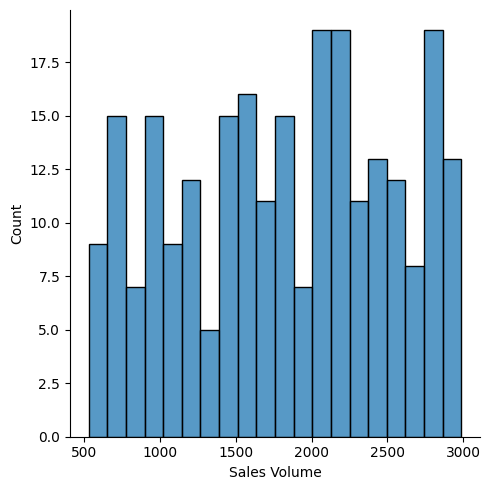

In [156]:
sns.displot(df["Sales Volume"], bins=20) 
plt.show()

In [157]:
#Decidimos que una prenda se está vendiendo bien cuanto está por encima de 1839 unidades (la mediana), podríamos aplicar también un hypothesis testing para corroborarlo

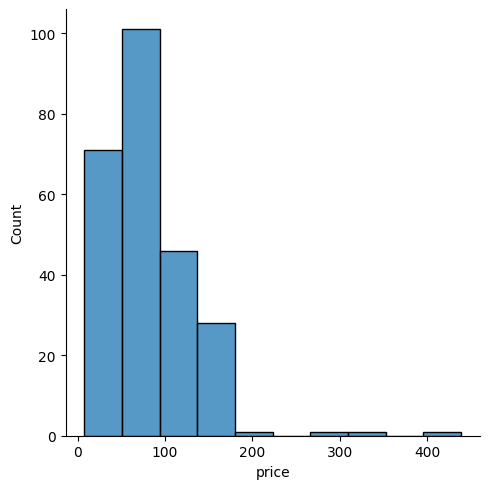

In [158]:
sns.displot(df["price"], bins=10) 
plt.show()

In [159]:
#Los precios están la mayoría por debajo de 100€

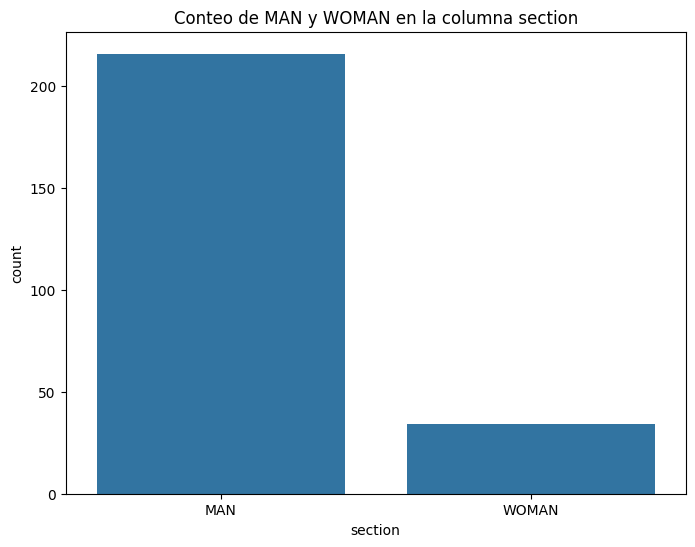

In [160]:
# 1. Gráfico de barras para el conteo de "MAN" y "WOMAN" en la columna "section"
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="section")
plt.title('Conteo de MAN y WOMAN en la columna section')
plt.show()

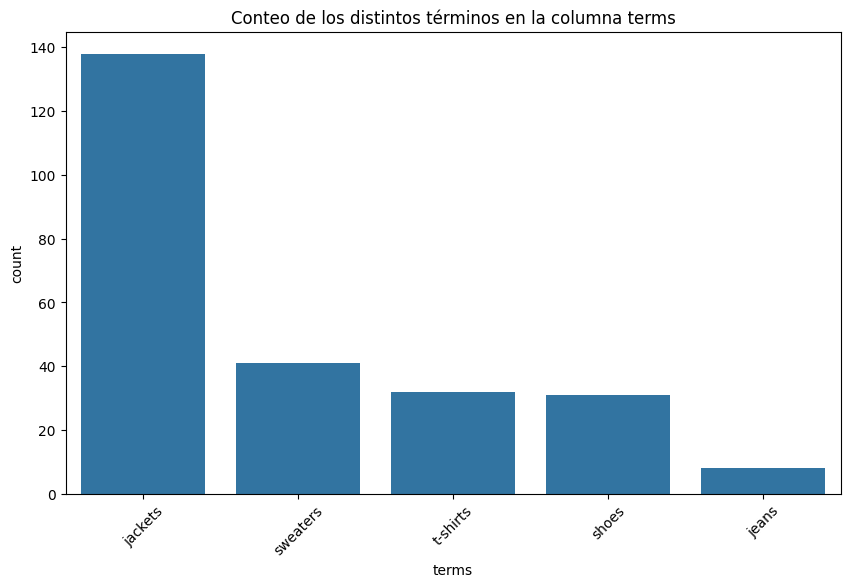

In [161]:
# 2. Gráfico de barras para el conteo de las distintas categorías en la columna "terms"
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="terms", order=df['terms'].value_counts().index)
plt.title('Conteo de los distintos términos en la columna terms')
plt.xticks(rotation=45)
plt.show()

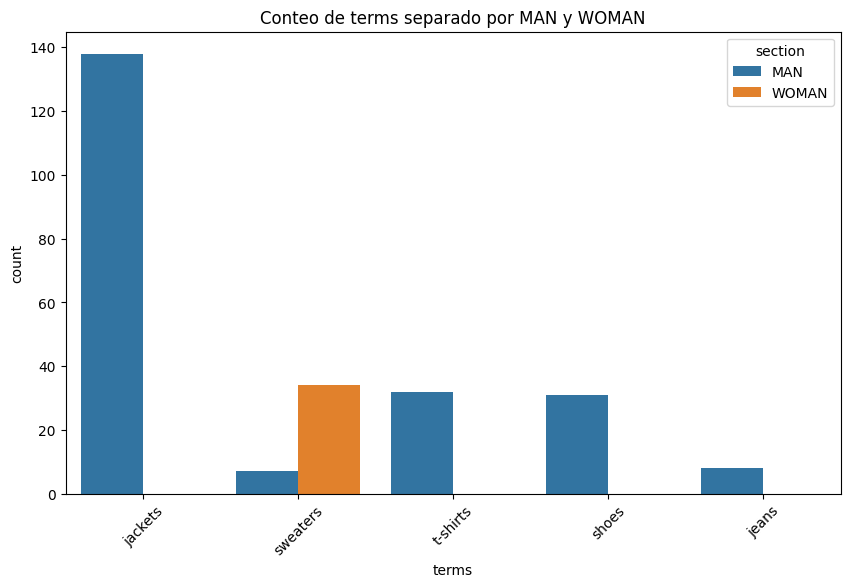

In [162]:
# 3. Gráfico filtrado de "terms" separado por "MAN" y "WOMAN"
plt.figure(figsize=(10, 6))
sns.countplot(data=df[df['section'].isin(['MAN', 'WOMAN'])], x="terms", hue="section", order=df['terms'].value_counts().index)
plt.title('Conteo de terms separado por MAN y WOMAN')
plt.xticks(rotation=45)
plt.show()

In [163]:
#No deberíamos hacer un oversample de WOMAN ya que solo tenemos información de sudaderas de mujer, podemos elegir 1 , usar solo hombres y hacer un oversample, 2. Hacer solo de sweaters y analizar de mujer

In [164]:
#Vamos a eliminar WOMAN y hacer un oversample del resto para igualar al total de jackets

In [165]:
df = df[df["section"] != "WOMAN"]
df = df.drop(columns="section", axis =1)

Preparar los datos para el modelo

In [166]:
#1. Oversample de los "terms" para tener una igualdad de todos los productos
#2. Añadir columna booleana success donde Sales Volume > 1839
#3. Analizamos con un Description con un LLM (usando transformers) para clasificar en Utility, Urban, Dialy
#4. Quitamos name y description


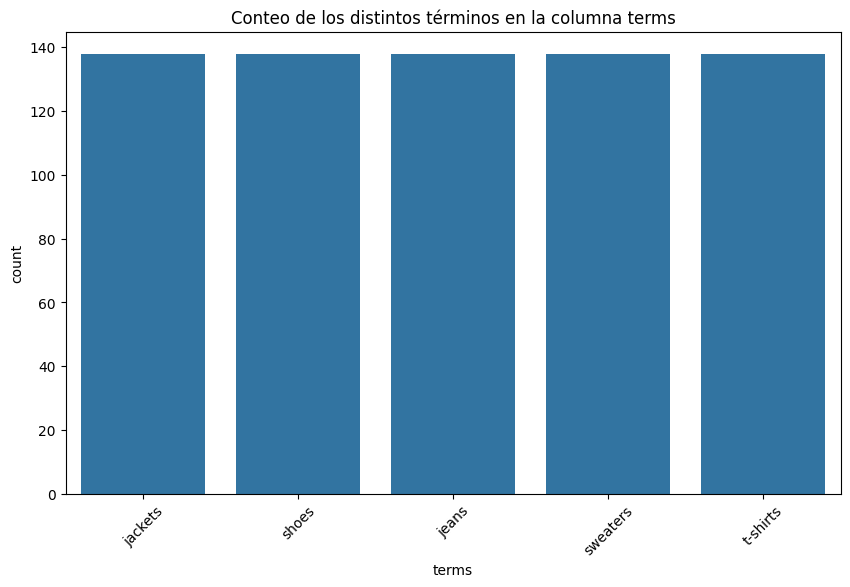

In [167]:
#1. Oversample de terms

max_count = df['terms'].value_counts().max()

df_balanced = pd.DataFrame()

for term in df['terms'].unique():
    df_term = df[df['terms'] == term]
    df_term_oversampled = resample(df_term, replace=True, n_samples=max_count, random_state=42)
    df_balanced = pd.concat([df_balanced, df_term_oversampled])

plt.figure(figsize=(10, 6))
sns.countplot(data=df_balanced, x="terms", order=df_balanced['terms'].value_counts().index)
plt.title('Conteo de los distintos términos en la columna terms')
plt.xticks(rotation=45)
plt.show()

In [168]:
df = df_balanced

In [169]:
#2. Añadir columna booleana success donde Sales Volume > 1839

df["success"] = df["Sales Volume"] > 1839

In [170]:
#3. Analizamos con un Name y Description con un LLM (transformers) para saber si es: Casual, Formal, Sport, Fancy

import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("valhalla/distilbart-mnli-12-1")
model = AutoModelForSequenceClassification.from_pretrained("valhalla/distilbart-mnli-12-1")



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [171]:
labels = ["utility", "urban", "daily"]

def classify_description(description):
    if isinstance(description, str):
        inputs = tokenizer(description, return_tensors="pt", truncation=True, padding=True)
        with torch.no_grad():
            outputs = model(**inputs)
        logits = outputs.logits
        probs = torch.softmax(logits, dim=-1)
        predicted_class = torch.argmax(probs, dim=-1).item()

        return labels[predicted_class]
    else:
        return None 


df['classification'] = df['description'].apply(classify_description)


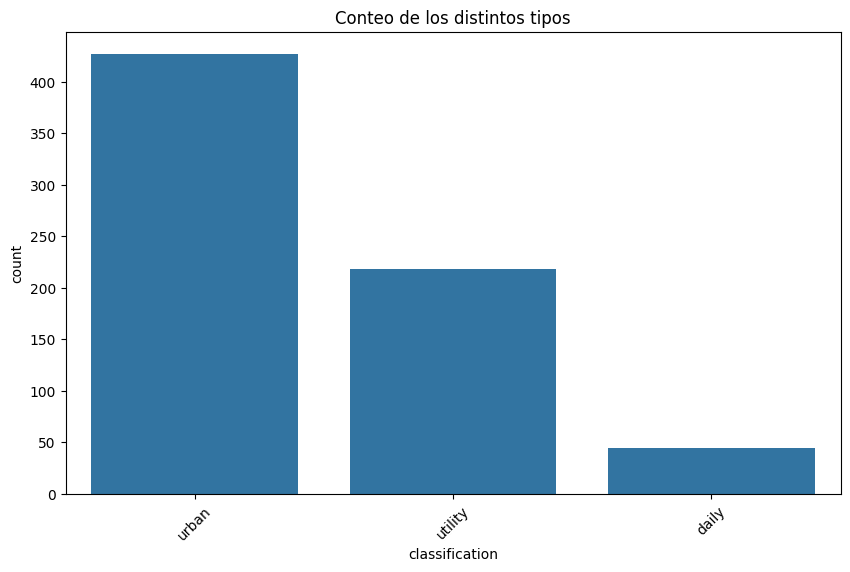

In [173]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="classification", order=df['classification'].value_counts().index)
plt.title('Conteo de los distintos tipos')
plt.xticks(rotation=45)
plt.show()

In [176]:
#4. Aplicamos un One-hot-encoder a todas las variables para poder después aplicar el modelo, quitamos Name y Description que ya no nos sirve

df = df.drop(["name", "description"], axis = 1)

In [178]:
df.head()

,Product Position,Promotion,Seasonal,Sales Volume,price,terms,success,classification
104,Front of Store,Yes,Yes,2185,159.0,jackets,True,urban
94,End-cap,Yes,Yes,1017,109.0,jackets,False,utility
14,Aisle,Yes,Yes,2265,99.9,jackets,True,urban
108,Aisle,Yes,No,1796,79.9,jackets,False,utility
73,Aisle,Yes,No,2170,49.9,jackets,True,daily


Machine Learning = Random forest classifier

In [218]:
X = df.drop(columns = ["success", "Sales Volume"]) #Si Sales Volume es superior a 1834, es success, por ello lo quitamos ya que no sabríamos cuanto vamos a vender
y = df["success"]

In [228]:
X

,price,Product Position_Aisle,Product Position_End-cap,Product Position_Front of Store,Promotion_No,Promotion_Yes,Seasonal_No,Seasonal_Yes,terms_jackets,terms_jeans,terms_shoes,terms_sweaters,terms_t-shirts,classification_daily,classification_urban,classification_utility
0,159.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,109.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,99.9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,79.9,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,49.9,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,89.9,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
686,45.9,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
687,45.9,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
688,19.9,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [219]:
X_cat = X.select_dtypes(include='object')
X_num = X.select_dtypes(include=[np.number])

In [220]:
#OneHotEncoder
encoder = OneHotEncoder().fit(X_cat) 
encoded = encoder.transform(X_cat).toarray()
unique_values = [encoder.categories_[i] for i in range(len(X_cat.columns))]
onehot_encoded = pd.DataFrame(encoded, columns=[f"{col}_{value}" for col, values in zip(X_cat.columns, unique_values) for value in values]) 

In [221]:
X = pd.concat([X_num.reset_index(drop=True), onehot_encoded.reset_index(drop=True)], axis=1)

In [222]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [223]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [224]:
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
y_pred = rf_classifier.predict(X_test)

In [226]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 91.30%

Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.90      0.92        77
        True       0.88      0.93      0.90        61

    accuracy                           0.91       138
   macro avg       0.91      0.92      0.91       138
weighted avg       0.92      0.91      0.91       138



In [229]:
r2 = r2_score(y_test, y_pred)

print(f"R² Score: {r2:.2f}")

R² Score: 0.65
